Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Arina Sakova"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [1]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        val = 0
        n = self.xk.shape[0]
 
        for i in range(n):
            t = 1
            for j in range(n):
                if j!=i:
                    t = t * (x-self.xk[j])/(self.xk[i]-self.xk[j])
            val += self.yk[i]*t
        return val

In [2]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


In [13]:
import numpy as np
import sympy

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

def plot_interp(func, intr, nodes):
    xn = np.linspace(-2, 2, 401)
    yn = [intr(xval) for xval in xn]
    
    plt.plot(xn, yn, '-', alpha = 0.7, label=r'interp, $n= %s$' %(len(nodes) - 1) )
    plt.plot(xn, func(xn), label=r'$f(x)$')
    plt.plot(nodes, yy, 'o', ms = 7)
    
    plt.legend(loc='best')

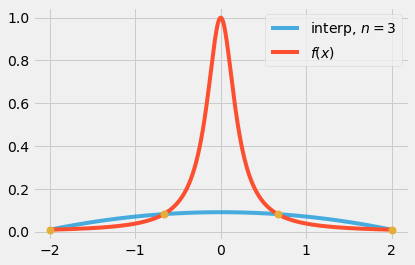

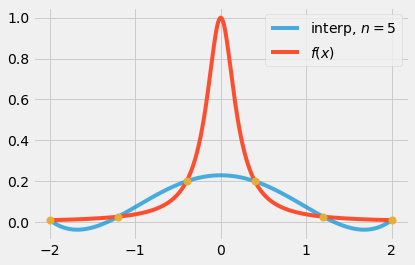

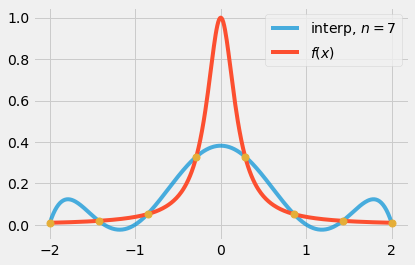

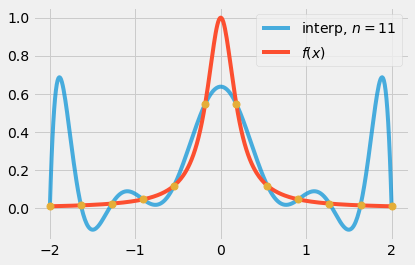

In [14]:
for m in [3,5,7,11]:
    xx = np.linspace(-2, 2, m + 1)
    yy = runge_func(xx)

    lagr = LagrangeInterpolator(xx, yy)
    
    plt.figure()
    plot_interp(runge_func, lagr, xx)

In [15]:
def cheb_nodes(n, a, b):
    x = np.empty(n)
    for i in range(1, n + 1):
        x[i - 1] = 0.5*(a + b) + 0.5*(b - a)*np.cos((2*i - 1)*np.pi/(2*n))
    return x

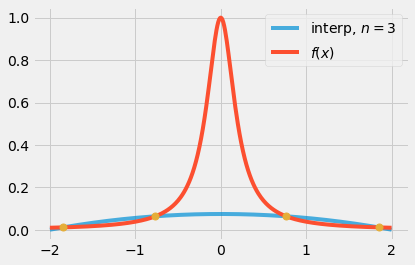

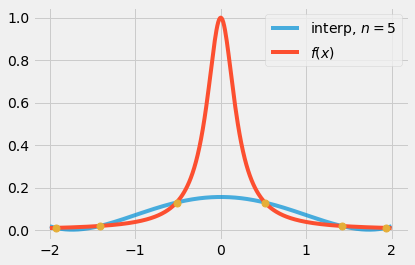

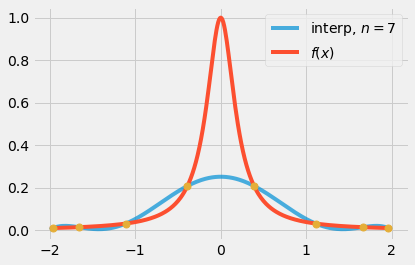

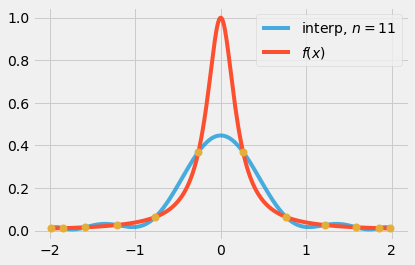

In [16]:
for m in [3, 5, 7, 11]:
    xx = cheb_nodes(m + 1, -2, 2)
    yy = runge_func(xx)

    lagr = LagrangeInterpolator(xx, yy)
    
    plt.figure()
    plot_interp(runge_func, lagr, xx)